In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 1/csv_ensemble1/csv_ensemble1/training_set_upper_lower.csv')

# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('0', axis=1).to_numpy()
x_test = test_data.drop('0', axis=1).to_numpy()
y_train = train_data['0'].to_numpy()
y_test = test_data['0'].to_numpy()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Values before rescaling: ', np.unique(x_train))

#Feature Scaling
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Values after rescaling: ', np.unique(x_train))

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

(1719, 170)
(573, 170)
(1719,)
(573,)
Values before rescaling:  [    0     1     2 ... 25498 25499 25500]
Values after rescaling:  [0.00000000e+00 3.92156863e-05 7.84313725e-05 ... 9.99960784e-01
 1.00000000e+00 1.00000000e+00]


1) Model 1 --> 9

In [116]:
model1 = Sequential()
model1.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model1.compile(optimizer='adam', loss='mse',metrics='accuracy')
hist1 = model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20


171/172 [============================>.] - ETA: 0s - loss: 0.4977 - accuracy: 0.5023

172/172 [==============================] - 1s 6ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 2/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 3/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 4/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 5/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 6/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 7/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020 - val_loss: 0.5044 - val_accuracy: 0.4956
Epoch 8/20
172/17

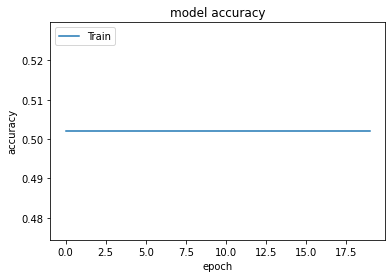

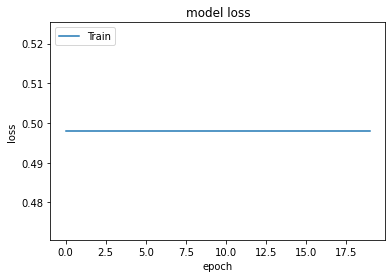

In [115]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [21]:
model2 = Sequential()
model2.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model2.compile(optimizer='adam', loss='mae',metrics='accuracy')
hist2 = model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 11/2

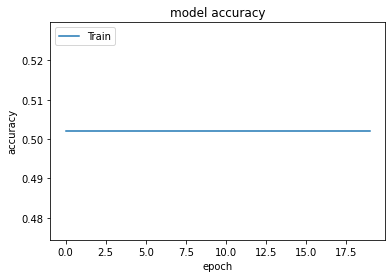

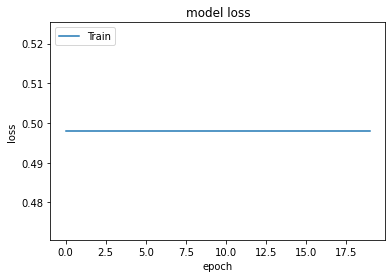

In [112]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [24]:
model3 = Sequential()
model3.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model3.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')
hist3 = model3.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.7061 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.6058 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5581 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.5020
Epoch 11/2

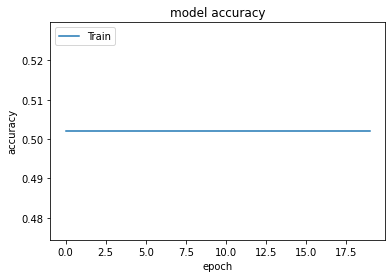

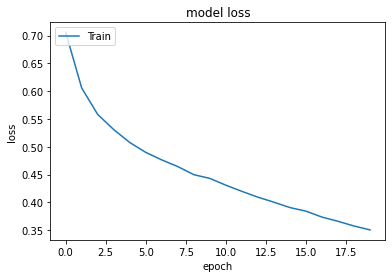

In [111]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [26]:
model4 = Sequential()
model4.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model4.compile(optimizer='rmsprop', loss='mse',metrics='accuracy')
hist4 = model4.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 11/2

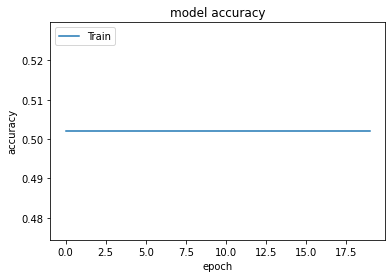

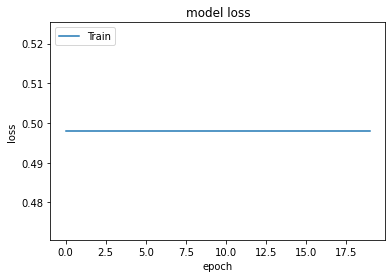

In [110]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist4.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist4.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [28]:
model5 = Sequential()
model5.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model5.compile(optimizer='rmsprop', loss='mae',metrics='accuracy')
hist5 = model5.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 11/2

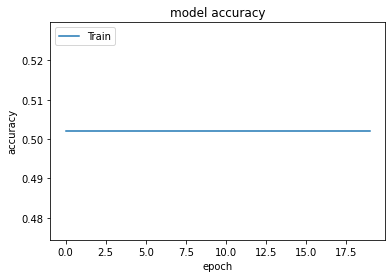

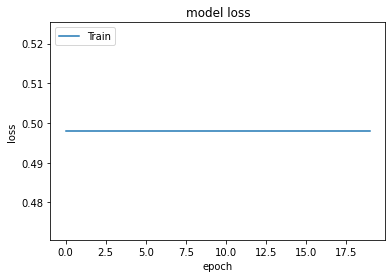

In [109]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist5.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist5.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [30]:
model6 = Sequential()
model6.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model6.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='accuracy')
hist6 = model6.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.6889 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4628 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.5020
Epoch 11/2

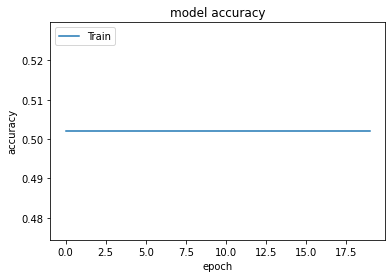

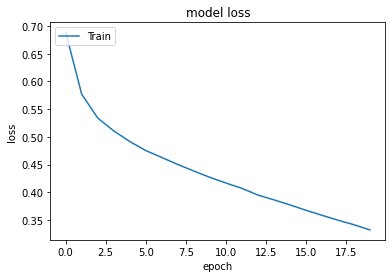

In [108]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist6.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist6.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [31]:
model7 = Sequential()
model7.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model7.compile(optimizer='sgd', loss='mse', metrics='accuracy')
hist7 = model7.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 11/2

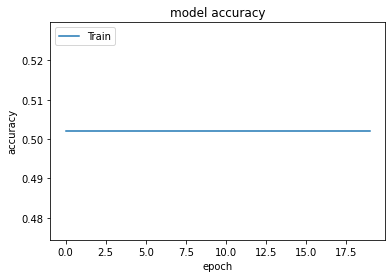

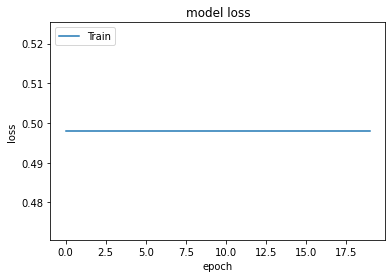

In [107]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist7.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist7.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [32]:
model8 = Sequential()
model8.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model8.compile(optimizer='sgd', loss='mae', metrics='accuracy')
hist8 = model8.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.5020
Epoch 11/2

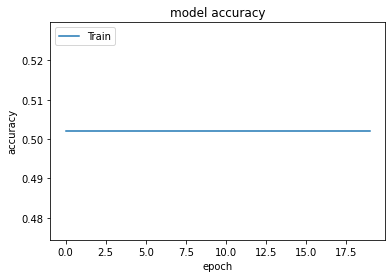

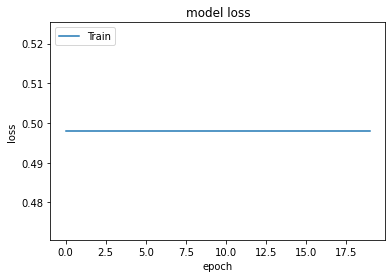

In [106]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist8.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist8.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [33]:
model9 = Sequential()
model9.add(Dense(units=1,input_shape=(None,170),activation='softmax'))
model9.compile(optimizer='sgd', loss='binary_crossentropy', metrics ='accuracy')
hist9 = model9.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.6181 - accuracy: 0.5020
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.5020
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5317 - accuracy: 0.5020
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5081 - accuracy: 0.5020
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4904 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.5020
Epoch 11/2

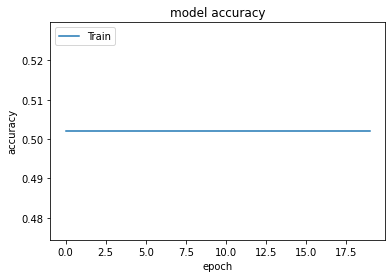

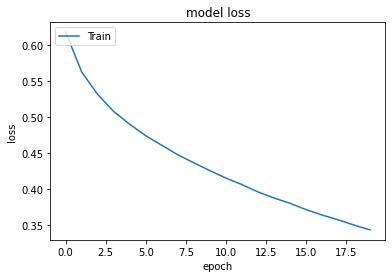

In [105]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist9.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist9.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

Model 10-->18

In [34]:
model10 = Sequential()
model10.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model10.compile(optimizer='adam', loss='mse', metrics="accuracy")
hist10 = model10.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.2468 - accuracy: 0.6347
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.7737
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.8237
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.8668
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1058 - accuracy: 0.8866
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9197
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9348
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9482
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9663
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9703
Epoch 11/2

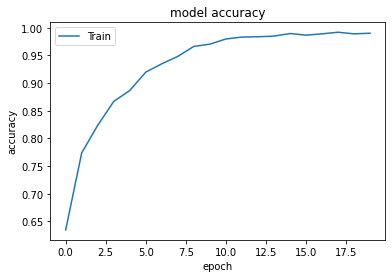

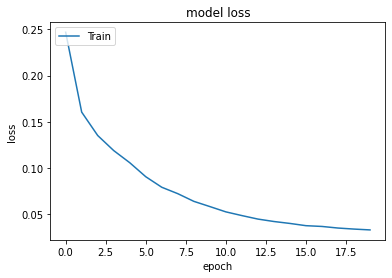

In [104]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist10.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist10.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [35]:
model11 = Sequential()
model11.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model11.compile(optimizer='adam', loss='mae', metrics="accuracy")
hist11 = model11.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.5091 - accuracy: 0.4933
Epoch 2/20
172/172 [==============================] - 1s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 3/20
172/172 [==============================] - 1s 4ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 5/20
172/172 [==============================] - 1s 4ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 11/2

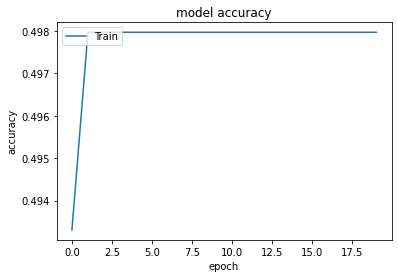

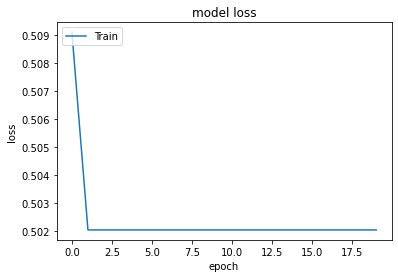

In [103]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist11.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist11.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [36]:
model12 = Sequential()
model12.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model12.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
hist12 = model12.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 2.3123 - accuracy: 0.5183
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 1.6085 - accuracy: 0.5590
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 1.7168 - accuracy: 0.5736
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 1.6104 - accuracy: 0.5881
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 1.3519 - accuracy: 0.5852
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 1.1149 - accuracy: 0.6021
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.9915 - accuracy: 0.6114
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.8280 - accuracy: 0.6277
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.7545 - accuracy: 0.6306
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.7193 - accuracy: 0.6475
Epoch 11/2

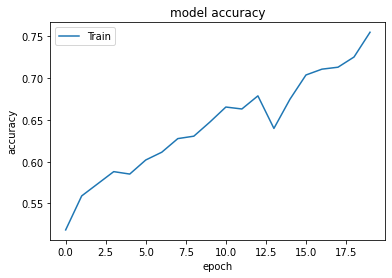

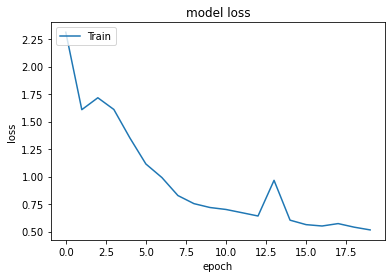

In [102]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist12.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist12.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [37]:
model13 = Sequential()
model13.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model13.compile(optimizer='rmsprop', loss='mse', metrics='accuracy')
hist13 = model13.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.4980
Epoch 11/2

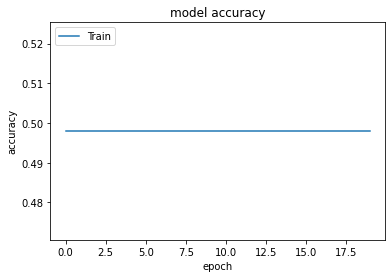

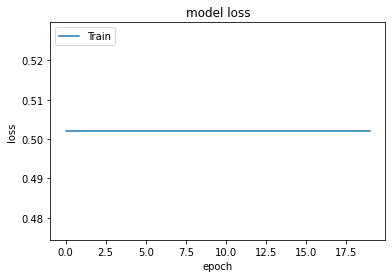

In [101]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist13.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist13.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [38]:
model14 = Sequential()
model14.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model14.compile(optimizer='rmsprop', loss='mae', metrics='accuracy')
hist14 = model14.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.5422
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.6981
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.7551
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2841 - accuracy: 0.7871
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8185
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.8441
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.8720
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2074 - accuracy: 0.8959
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9168
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1770 - accuracy: 0.9372
Epoch 11/2

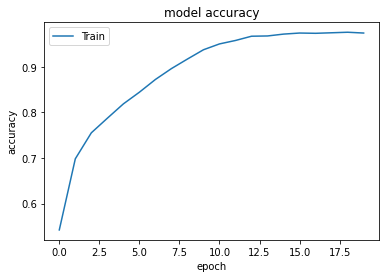

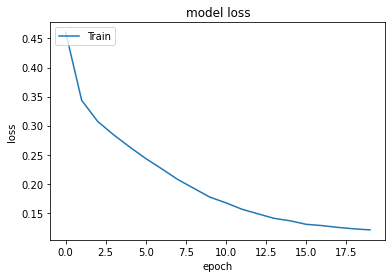

In [100]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist14.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist14.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [39]:
model15 = Sequential()
model15.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model15.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
hist15 = model15.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 1.6676 - accuracy: 0.5364
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7016
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.7784
Epoch 4/20
172/172 [==============================] - 1s 3ms/step - loss: 0.4628 - accuracy: 0.8150
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8325
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3692 - accuracy: 0.8674
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.8854
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.8988
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.9081
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9226
Epoch 11/2

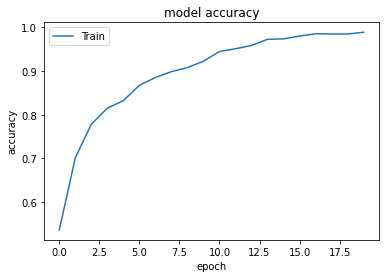

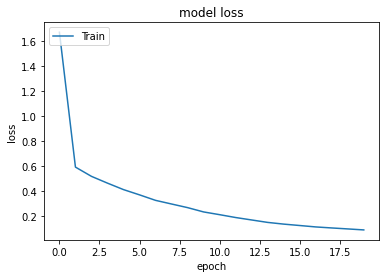

In [99]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist15.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist15.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [40]:
model16 = Sequential()
model16.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model16.compile(optimizer='sgd', loss='mse', metrics='accuracy')
hist16 = model16.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.6265
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.7766
Epoch 3/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1170 - accuracy: 0.8569
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.8999
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9314
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9540
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9634
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9756
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9773
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 11/2

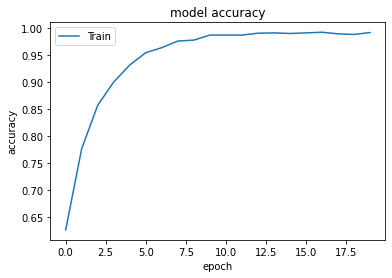

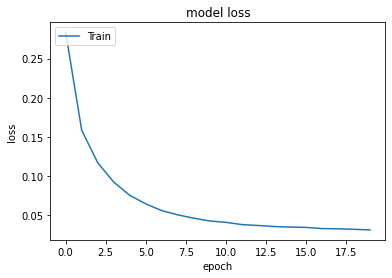

In [98]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist16.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist16.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [42]:
model17 = Sequential()
model17.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model17.compile(optimizer='sgd', loss='mae',metrics='accuracy')
hist17 = model17.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.5567
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.6847
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.7877
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.8342
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.8895
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9145
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.9471
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9529
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1429 - accuracy: 0.9663
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9721
Epoch 11/2

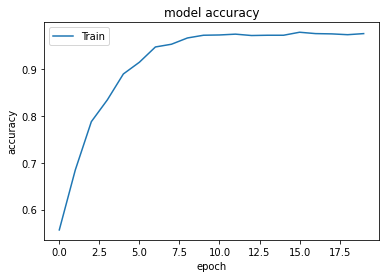

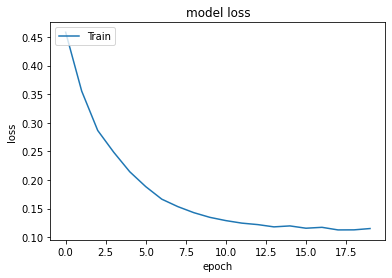

In [97]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist17.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist17.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [43]:
model18 = Sequential()
model18.add(Dense(units=1,input_shape=(None,170),activation='relu'))
model18.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')
hist18 = model18.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 7.5659 - accuracy: 0.4997
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 7.7439 - accuracy: 0.4980
Epoch 11/2

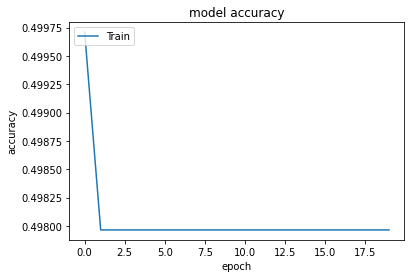

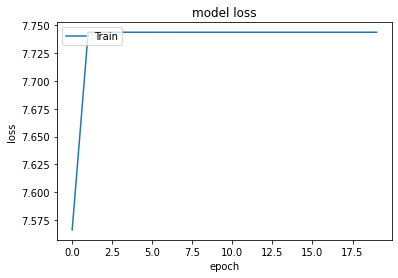

In [96]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist18.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist18.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

Model 19-->27

In [44]:
model19 = Sequential()
model19.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model19.compile(optimizer='adam', loss='mse', metrics='accuracy')
hist19 = model19.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.4508
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.5969
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.6934
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1797 - accuracy: 0.7522
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1646 - accuracy: 0.7818
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.8191
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.8487
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.8732
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.8941
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9186
Epoch 11/2

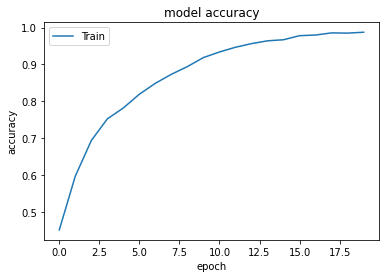

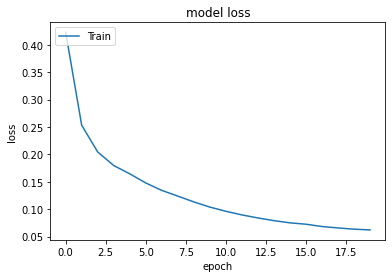

In [95]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist19.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist19.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [45]:
model20 = Sequential()
model20.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model20.compile(optimizer='adam', loss='mae', metrics='accuracy')
hist20 = model20.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.5110 - accuracy: 0.5579
Epoch 2/20
172/172 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.6940
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.7400
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.7650
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.7824
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8092
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8266
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8615
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2792 - accuracy: 0.8773
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.8999
Epoch 11/2

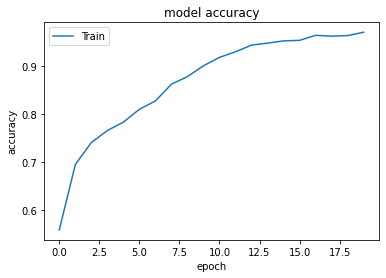

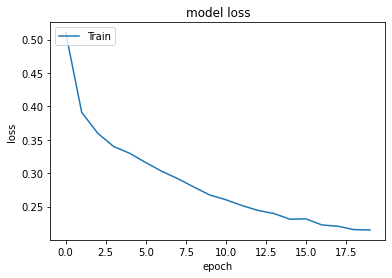

In [94]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist20.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist20.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [46]:
model21 = Sequential()
model21.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model21.compile(optimizer='adam', loss='binary_crossentropy',metrics='accuracy')
hist21 = model21.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 1.7106 - accuracy: 0.5049
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 1.3938 - accuracy: 0.5049
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 1.3341 - accuracy: 0.5090
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 1.2912 - accuracy: 0.5119
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 1.2351 - accuracy: 0.5212
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 1.1969 - accuracy: 0.5340
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 1.1740 - accuracy: 0.5125
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.9528 - accuracy: 0.5201
Epoch 9/20
172/172 [==============================] - 1s 3ms/step - loss: 0.8733 - accuracy: 0.5404
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.8478 - accuracy: 0.5654
Epoch 11/2

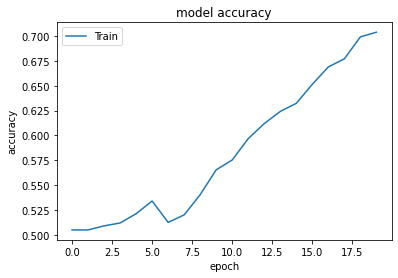

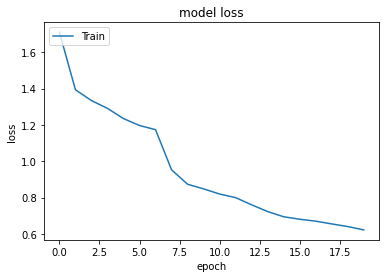

In [93]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist21.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist21.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [47]:
model22 = Sequential()
model22.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model22.compile(optimizer='rmsprop', loss='mse',metrics='accuracy')
hist22 = model22.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.5910
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.7400
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.7941
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.8319
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.8662
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.8953
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9209
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9325
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9476
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.0817 - accuracy: 0.9668
Epoch 11/2

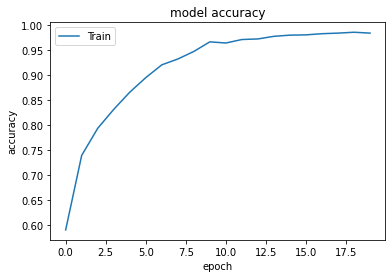

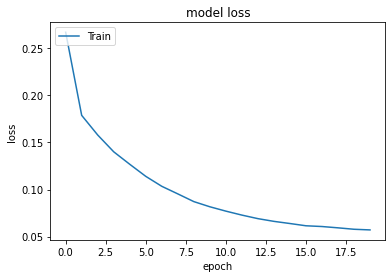

In [92]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist22.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist22.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [49]:
model23 = Sequential()
model23.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model23.compile(optimizer='rmsprop', loss='mae', metrics='accuracy')
hist23 = model23.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4790 - accuracy: 0.5625
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3892 - accuracy: 0.6894
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.7208
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.7429
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.7656
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3253 - accuracy: 0.7830
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8051
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8214
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8534
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8575
Epoch 11/2

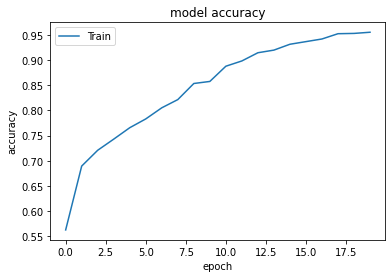

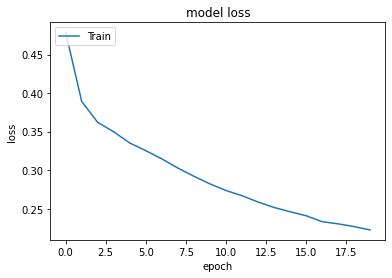

In [91]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist23.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist23.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [50]:
model24 = Sequential()
model24.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model24.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics='accuracy')
hist24 = model24.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.9595 - accuracy: 0.5288
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6533
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7353
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7749
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.8074
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8261
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8429
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8720
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8877
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3069 - accuracy: 0.9017
Epoch 11/2

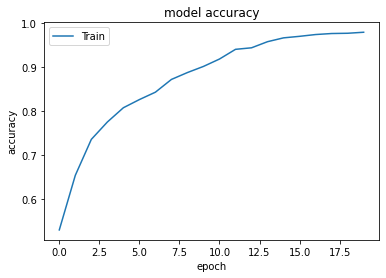

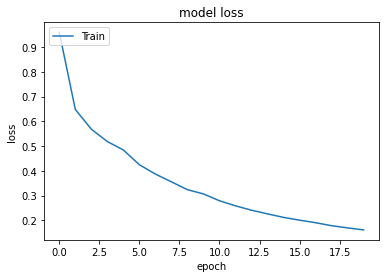

In [90]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist24.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist24.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [51]:
model25 = Sequential()
model25.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model25.compile(optimizer='sgd', loss='mse', metrics='accuracy')
hist25 = model25.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.2792 - accuracy: 0.5910
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.7650
Epoch 3/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.8220
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.8645
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.8930
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9156
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9418
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9558
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9668
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9756
Epoch 11/2

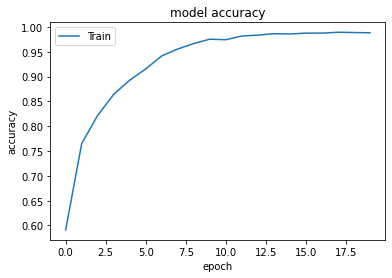

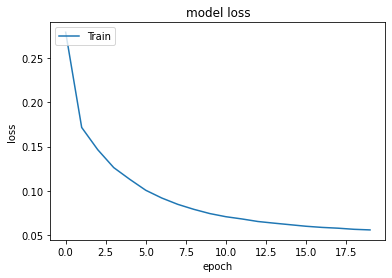

In [89]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist25.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist25.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [52]:
model26 = Sequential()
model26.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model26.compile(optimizer='sgd', loss='mae',metrics='accuracy')
hist26 = model26.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4520 - accuracy: 0.5841
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.6451
Epoch 3/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.7039
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.7405
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.7778
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8220
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8517
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8877
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.9151
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9279
Epoch 11/2

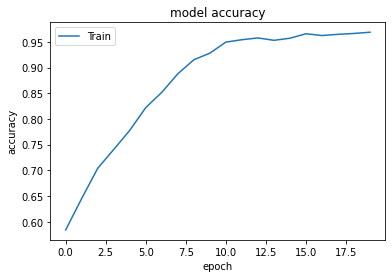

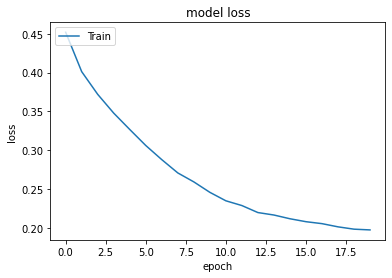

In [88]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist26.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist26.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [53]:
model27 = Sequential()
model27.add(Dense(units=1,input_shape=(None,170),activation='tanh'))
model27.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')
hist27 = model27.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 1.3690 - accuracy: 0.6172
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.7528
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8522
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 5.9813 - accuracy: 0.5893
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 7.5936 - accuracy: 0.5020
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 7.5936 - accuracy: 0.5020
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 7.5936 - accuracy: 0.5020
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 7.5936 - accuracy: 0.5020
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 7.5936 - accuracy: 0.5020
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 7.5936 - accuracy: 0.5020
Epoch 11/2

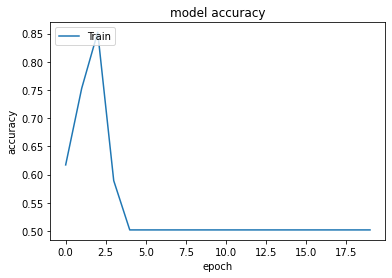

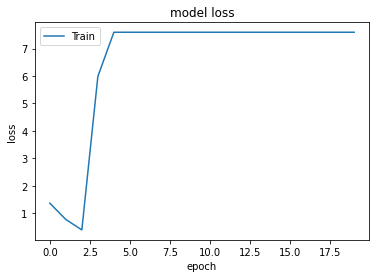

In [87]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist27.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist27.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

Model 28 -->36

In [54]:
model28 = Sequential()
model28.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model28.compile(optimizer='adam', loss='mse', metrics='accuracy')
hist28 = model28.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.2358 - accuracy: 0.6097
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.7365
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.7691
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.7987
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.8162
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.8226
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.8313
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1388 - accuracy: 0.8394
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.8453
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.8505
Epoch 11/2

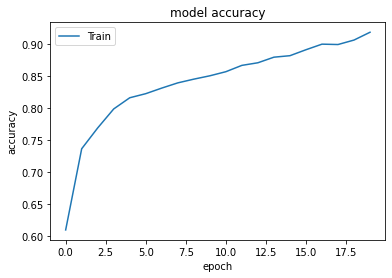

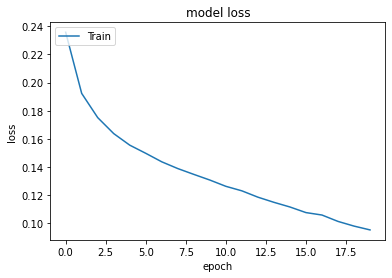

In [86]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist28.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist28.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [55]:
model29 = Sequential()
model29.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model29.compile(optimizer='adam', loss='mae', metrics='accuracy')
hist29 = model29.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.6446
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.7068
Epoch 3/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.7196
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3265 - accuracy: 0.7307
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.7371
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.7586
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.7615
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.7737
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.7766
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.7830
Epoch 11/2

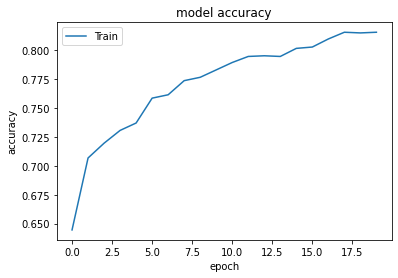

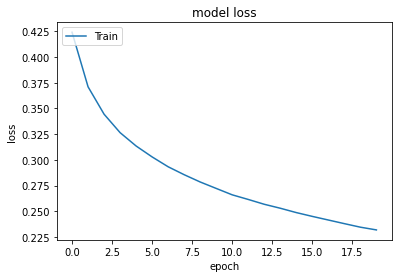

In [85]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist29.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist29.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [56]:
model30 = Sequential()
model30.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model30.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
hist30 = model30.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.6665 - accuracy: 0.6056
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5799 - accuracy: 0.7155
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7487
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7749
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4962 - accuracy: 0.7976
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.8022
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.8098
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.8232
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8266
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8348
Epoch 11/2

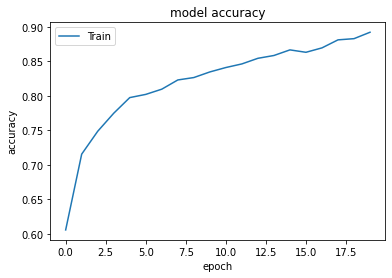

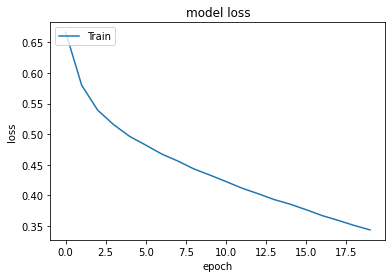

In [84]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist30.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist30.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [57]:
model31 = Sequential()
model31.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model31.compile(optimizer='rmsprop', loss='mse', metrics='accuracy')
hist31 = model31.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 4ms/step - loss: 0.2091 - accuracy: 0.6911
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.7574
Epoch 3/20
172/172 [==============================] - 1s 3ms/step - loss: 0.1705 - accuracy: 0.7778
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1615 - accuracy: 0.7958
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.8127
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.8185
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.8255
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.8383
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1341 - accuracy: 0.8429
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1295 - accuracy: 0.8464
Epoch 11/2

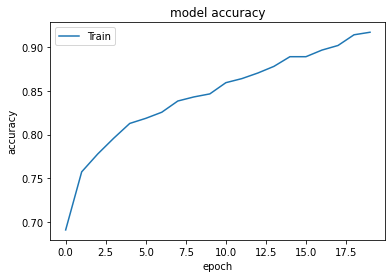

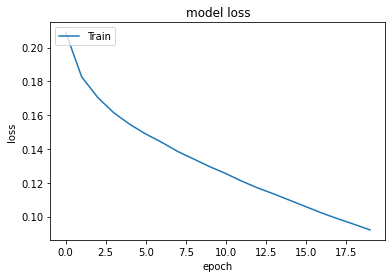

In [83]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist31.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist31.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [59]:
model32 = Sequential()
model32.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model32.compile(optimizer='rmsprop', loss='mae', metrics = 'accuracy')
hist32 = model32.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.6137
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.6806
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.7184
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.7272
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.7359
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.7481
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.7574
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.2861 - accuracy: 0.7685
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.7725
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.7778
Epoch 11/2

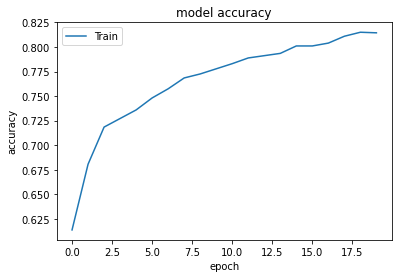

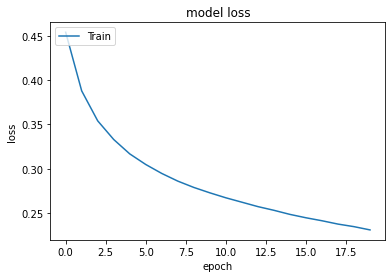

In [82]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist32.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist32.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [60]:
model33 = Sequential()
model33.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model33.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
hist33 = model33.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.6054 - accuracy: 0.6952
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7458
Epoch 3/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7731
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7923
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.8005
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8115
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.8197
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4390 - accuracy: 0.8290
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8266
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8394
Epoch 11/2

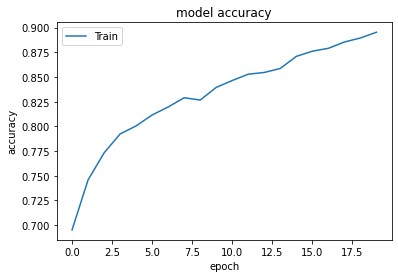

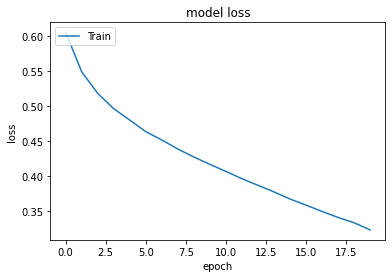

In [81]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist33.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist33.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [61]:
model34 = Sequential()
model34.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model34.compile(optimizer='sgd', loss='mse', metrics='accuracy')
hist34 = model34.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 2ms/step - loss: 0.2317 - accuracy: 0.6213
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.2060 - accuracy: 0.7080
Epoch 3/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.7446
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.7656
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.7772
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.7877
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.7952
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.1601 - accuracy: 0.8045
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.8115
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.1534 - accuracy: 0.8168
Epoch 11/2

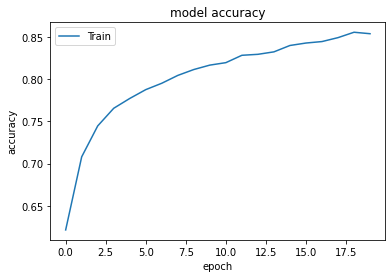

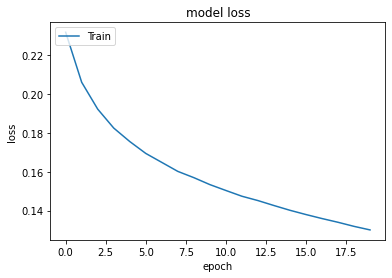

In [80]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist34.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist34.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [63]:
model35 = Sequential()
model35.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model35.compile(optimizer='sgd', loss='mae', metrics='accuracy')
hist35 = model35.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.4951
Epoch 2/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.5166
Epoch 3/20
172/172 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.6387
Epoch 4/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.7027
Epoch 5/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.7045
Epoch 6/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.7138
Epoch 7/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.7248
Epoch 8/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.7289
Epoch 9/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.7330
Epoch 10/20
172/172 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.7405
Epoch 11/2

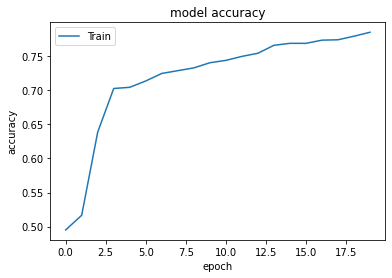

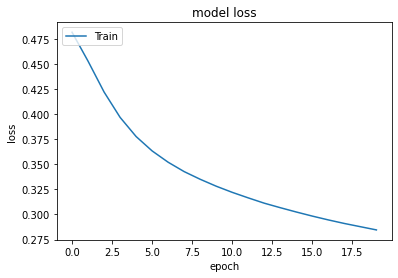

In [79]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist35.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist35.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [64]:
model36 = Sequential()
model36.add(Dense(units=1,input_shape=(None,170),activation='sigmoid'))
model36.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')
hist36 = model36.fit(x_train, y_train, epochs=20, batch_size=10)

Epoch 1/20


172/172 [==============================] - 1s 3ms/step - loss: 0.6381 - accuracy: 0.6463
Epoch 2/20
172/172 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.7405
Epoch 3/20
172/172 [==============================] - 1s 3ms/step - loss: 0.5236 - accuracy: 0.7720
Epoch 4/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7964
Epoch 5/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.8080
Epoch 6/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.8191
Epoch 7/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4495 - accuracy: 0.8278
Epoch 8/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8360
Epoch 9/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8470
Epoch 10/20
172/172 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8522
Epoch 11/2

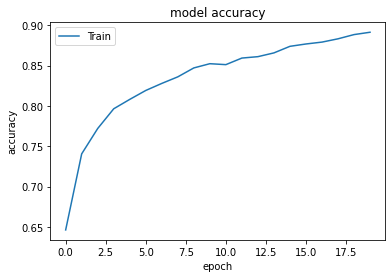

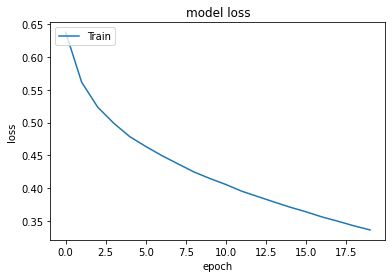

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist36.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist36.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [65]:
model36.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, None, 1)           171       
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [66]:
model36.get_config()

{'name': 'sequential_52',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, None, 170),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_52_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_52',
    'trainable': True,
    'batch_input_shape': (None, None, 170),
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

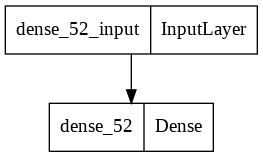

In [70]:
plot_model(model36, to_file='model36.png')

SGD: stochastic gradient descent, with support for momentum

RMSprop: adaptive learning rate optimization method proposed by Geoff Hinton
Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates

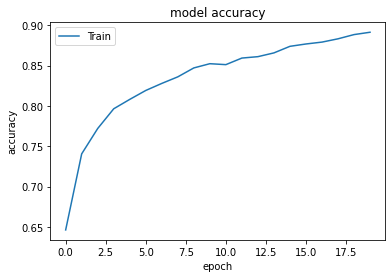

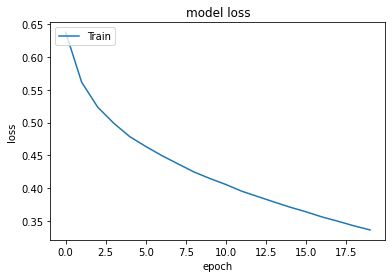

In [78]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist36.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist36.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer='sgd', loss=..., metrics=...)

In [ ]:
model.compile(optimizer='rmsprop', loss=..., metrics=...)

In [ ]:
model.compile(optimizer='adam', loss=..., metrics=...)

‘mse‘: for mean squared error
‘binary_crossentropy‘: for binary logarithmic loss (logloss)
‘categorical_crossentropy‘: for multi-class logarithmic loss (logloss)

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=...)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=...)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=...)

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(...)
model.compile(optimizer=sgd)

In [ ]:
model.compile(optimizer='sgd')

In [ ]:
model.fit(X, y, epochs=..., batch_size=...)

In [ ]:
model.summary()

In [ ]:
model.get_config()

In [ ]:
from tensorflow.keras.utils import plot_model
plot(model, to_file='model.png')